# Lab Report 3: Null Value handling, Duplicate Value Handling, Outlier Remove

In [23]:
# Previous
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('../dataset/heart disease classification dataset.csv')

df1 = df.copy()

In [24]:
# Number of Null values
null_count = df1.isnull().sum()
print("Number of Null values:")
print(null_count)

Number of Null values:
Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64


In [25]:
# Dropping Null Values
df1_dropped = df1.dropna()
print("After dropping null values, shape:", df1_dropped.shape)

After dropping null values, shape: (293, 15)


In [26]:
# Finding Missing Index
age_missing_index = df1[df1['age'].isnull()].index.tolist()
print("Missing index for age column:", age_missing_index)

Missing index for age column: []


In [27]:
# Handling Null Values using fillna()
trestbps_mean = df1['trestbps'].mean()
df1['trestbps'].fillna(trestbps_mean, inplace=True)

/tmp/ipykernel_11302/4045185199.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['trestbps'].fillna(trestbps_mean, inplace=True)


In [28]:
# Using Simple Imputer
imputer = SimpleImputer(strategy='median')
df1['chol'] = imputer.fit_transform(df1[['chol']])

In [29]:
# Finding duplicated values
duplicate_count = df1.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)

Number of duplicated rows: 0


In [30]:
# Removing duplicated values
df1_no_duplicates = df1.drop_duplicates()
print("Shape after removing duplicates:", df1_no_duplicates.shape)

Shape after removing duplicates: (303, 15)


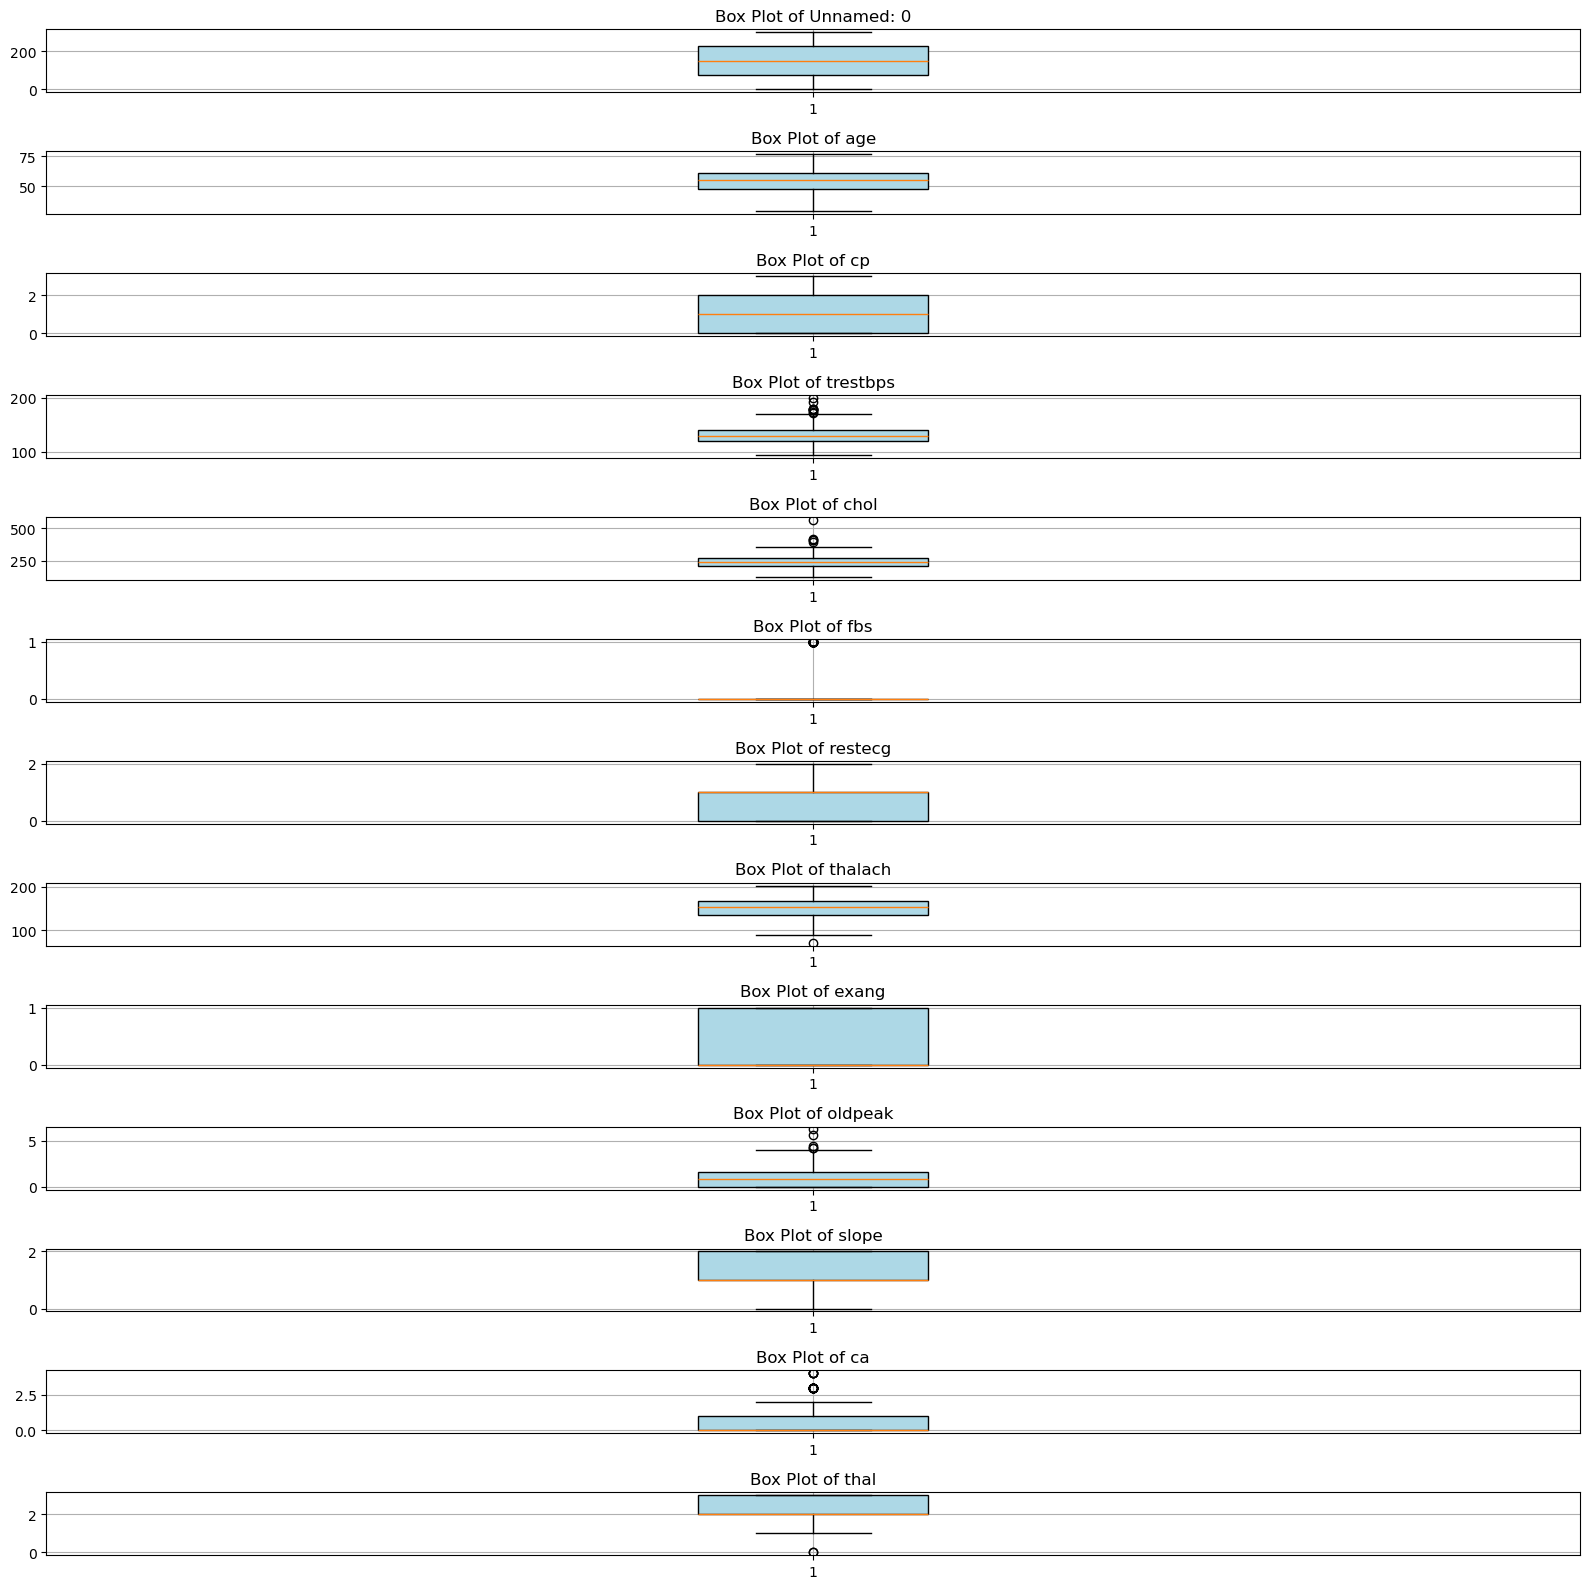

In [31]:



# Box Plot for Visualization
plt.figure(figsize=(16, 16))
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    plt.boxplot(df1[column].dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Box Plot of {column}')
    plt.grid(True)
plt.tight_layout()
plt.show()




In [32]:
# Finding number of outliers (for 'oldpeak' column)
Q1 = df1['oldpeak'].quantile(0.25)
Q3 = df1['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df1[(df1['oldpeak'] < lower_bound) | (df1['oldpeak'] > upper_bound)]
print(f"Number of outliers in 'oldpeak': {len(outliers)}")

Number of outliers in 'oldpeak': 5


In [33]:
# Removing Outliers
df1_no_outliers = df1[(df1['oldpeak'] >= lower_bound) & (df1['oldpeak'] <= upper_bound)]